### Build MC simulation to estimate touchdown location of planes landing at Montgomery field.
- 3dof equations of motion
- const airspeed of 140 ft/s
- const vertical flight path of -3.0 deg
- 1,000 trials
- trials start 4nmi from touch down point
- winds are constant but selected randomly
    - mean: 0, std: 0.1 ft/s
    

In [1]:
import random
import math
import matplotlib.pyplot as plt

In [2]:
d2r = math.pi/180

v = 140 # ft/s, airspeed
start_dist = 4.0*6076.0 # ft
f_path = -3.0*d2r # vertical flight path angle [rad]
heading = -76.8*d2r # horizontal flight path angle [rad]
wind_std = 0.1 # wind std deviation ft/s
dt = 0.1 # time step [s]

start_alt = start_dist*math.tan(-f_path)
start_north = -start_dist*math.cos(heading)
start_east = -start_dist*math.sin(heading)

# touch down locations
east_td = []
north_td = []


In [6]:

# for 1000 samples, simulate fligtht until touch down
for _ in range(1000):
    east = start_east
    north = start_north
    alt = start_alt
    Wn = random.gauss(0,wind_std)
    We = random.gauss(0,wind_std)
    Wu = random.gauss(0,wind_std)
    
    # 3dof position equations
    while alt > 0 :
        dndt = v*math.cos(f_path)*math.cos(heading) + Wn
        dedt = v*math.cos(f_path)*math.sin(heading) + We
        dhdt = v*math.sin(f_path) + Wu
        north += dt*dndt
        east += dt*dedt
        alt += dt*dhdt
        
        
    east_td.append(east)
    north_td.append(north)

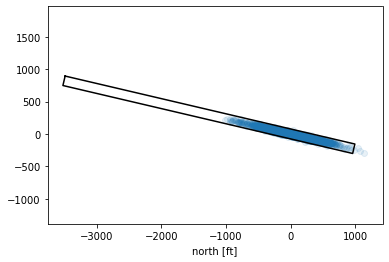

In [8]:
# draw runway
run_x = (3600,3600,-1000,-1000,3600)
run_y = (75,-75,-75,75,75)

# rotate runway
run_east = []
run_north = []
for k in range(len(run_x)):
    run_north.append(run_x[k]*math.cos(heading)-run_y[k]*math.sin(heading))
    run_east.append(run_x[k]*math.sin(heading)+run_y[k]*math.cos(heading))
      
# plotting
plt.plot(run_east,run_north,color='black')
plt.scatter(east_td,north_td,alpha=0.1)
plt.xlabel('east [ft]')
plt.xlabel('north [ft]')
plt.axis('equal')
plt.show()